In [1]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# list of json files in current directory
instruction_list = glob.glob("data/instruction/*.json")
base_list = glob.glob("data/*.json")

In [96]:
data_2b = {}
data_350m = {}
data_6b = {}
data_16b = {}
i_2b = 0
i_350m = 0
i_6b = 0
i_16b = 0
for file in base_list:
    with open(file, "r") as json_file:
        data = json.load(json_file)
    for i, seed in enumerate(data["permutations"]):
        if len(seed) > 1:
            seed_str = ", ".join(seed)
        else:
            seed_str = seed[0]
            if len(data["fitnesses"][seed_str]) == 0:
                data["fitnesses"][seed_str] = [0]
        # data["fitnesses"][seed_str] = list(set(data["fitnesses"][seed_str]))
        for j in range(len(data["fitnesses"][seed_str])):
            value = {
                "rates": data["rates"][i],
                "fitnesses": data["fitnesses"][seed_str][j],
                "qd_scores": data["qd_scores"][i],
                "niches": data["niches"][i],
                # "valid_stats": data["valid_stats"],
                # "fitness_stats": data["fitness_stats"],
                # "qd_stats": data["qd_stats"],
                "num_seeds": str(len(data["config"]["seeds"])),
                "seeds": ",".join(data["config"]["seeds"]),
            }
            if "2B" in data["config"]["model"]:
                value["model_size"] = "2B"
                data_2b[i_2b] = value
                i_2b += 1
            elif "16B" in data["config"]["model"]:
                value["model_size"] = "16B"
                data_16b[i_16b] = value
                i_16b += 1
            elif "6B" in data["config"]["model"]:
                value["model_size"] = "6B"
                data_6b[i_6b] = value
                i_6b += 1
            else:
                value["model_size"] = "350M"
                data_350m[i_350m] = value
                i_350m += 1

In [120]:
df_2b = pd.DataFrame.from_dict(data_2b, orient="index").sort_values(by="num_seeds")
df_350m = pd.DataFrame.from_dict(data_350m, orient="index").sort_values(by="num_seeds")
df_6b = pd.DataFrame.from_dict(data_6b, orient="index").sort_values(by="num_seeds")
combined = pd.concat([df_350m, df_2b, df_6b])
# df_16b = pd.DataFrame.from_dict(data_16b, orient="index").sort_values(by="num_seeds")

In [ ]:
df_350m.groupby("seeds").mean().sort_values(by="niches", ascending=False)

In [118]:
df_350m.groupby("num_seeds").mean()

,rates,fitnesses,qd_scores,niches
num_seeds,,,,
1,78.432726,148.681893,8676.109347,35.792162
2,63.915226,146.301059,10510.005993,50.975925
3,53.003003,140.620380,10861.409617,55.194022


In [12]:
df_2b.groupby("num_seeds").mean()

,rates,fitnesses,qd_scores,niches
num_seeds,,,,
1,48.836397,150.540132,6968.549789,37.461002
2,14.699190,152.841923,1990.225358,10.850649
3,13.888409,151.208616,2292.071084,13.401795


In [8]:
df_6b.groupby("num_seeds").mean()

,rates,fitnesses,qd_scores,niches
num_seeds,,,,
1,55.889982,162.547942,9091.189027,35.798577
2,27.611172,144.180409,2421.045293,14.919846
3,24.901164,145.495639,2604.547141,18.183999


In [9]:
df_16b.groupby("num_seeds").mean()

,rates,fitnesses,qd_scores,niches
num_seeds,,,,
1,65.778219,153.592265,7688.985287,35.369565
2,19.543511,147.595291,2189.407200,12.512469
3,13.474612,143.419134,1234.561960,8.768473


In [112]:
set(df_2b["seeds"].unique()) - set(df_6b["seeds"].unique())

{'cppn_fixed,cppn_mutable,runner'}

In [42]:
sns.set(rc={'figure.figsize':(15, 15)})

In [151]:
combined["new"] = combined["num_seeds"] + " - " + combined["model_size"]
combined["new"].replace({"1 - 350M": "1 seed - 350M", "2 - 350M": "2 seeds - 350M", "3 - 350M": "3 seeds - 350M",
                         "1 - 2B": "1 seed - 2B", "2 - 2B": "2 seeds - 2B", "1 - 6B": "1 seed - 6B", "2 - 6B": "2 seeds - 6B"}, inplace=True)
combined

,rates,fitnesses,qd_scores,niches,num_seeds,seeds,model_size,new
28988,93.096447,151.894762,1131.224885,7,1,square,350M,1 seed - 350M
3422,68.186424,46.733704,19226.623561,74,1,radial,350M,1 seed - 350M
3423,68.186424,170.853584,19226.623561,74,1,radial,350M,1 seed - 350M
3424,68.186424,12.183412,19226.623561,74,1,radial,350M,1 seed - 350M
3425,68.186424,13.215710,19226.623561,74,1,radial,350M,1 seed - 350M
...,...,...,...,...,...,...,...,...
3198,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 seeds - 6B
3199,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 seeds - 6B
3200,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 seeds - 6B
3202,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 seeds - 6B


In [213]:
# Filter combined to have num_seeds < 3
combined[combined["num_seeds"] != "3"].groupby("model_size").mean() 

,rates,fitnesses,qd_scores,niches
model_size,,,,
2B,75.007792,142.639042,8977.293144,47.233708
350M,66.209471,146.677309,10220.189744,48.576389
6B,85.702062,141.682550,4563.203049,28.427380


In [128]:
lst = ["1 - 350M", "2 - 350M", "3 - 350M", "1 - 2B", "2 - 2B", "1 - 6B", "2 - 6B"]
tst = combined.groupby("new").mean().loc[lst]
tst = tst.reset_index()

,rates,fitnesses,qd_scores,niches,num_seeds,seeds,model_size,new
28988,93.096447,151.894762,1131.224885,7,1,square,350M,1 - 350M
3422,68.186424,46.733704,19226.623561,74,1,radial,350M,1 - 350M
3423,68.186424,170.853584,19226.623561,74,1,radial,350M,1 - 350M
3424,68.186424,12.183412,19226.623561,74,1,radial,350M,1 - 350M
3425,68.186424,13.215710,19226.623561,74,1,radial,350M,1 - 350M
...,...,...,...,...,...,...,...,...
3198,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 - 6B
3199,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 - 6B
3200,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 - 6B
3202,53.259779,129.293962,6207.876131,38,2,"runner,radial",6B,2 - 6B


In [122]:
tst['index'] = tst['index'].apply(lambda x: f"{x[1]} seed - {x[0]}" if isinstance(x,tuple) else x)
# tst['index'] = tst['index'].to_list()[2:5] + tst['index'].to_list()[0:2] + tst['index'].to_list()[5:]

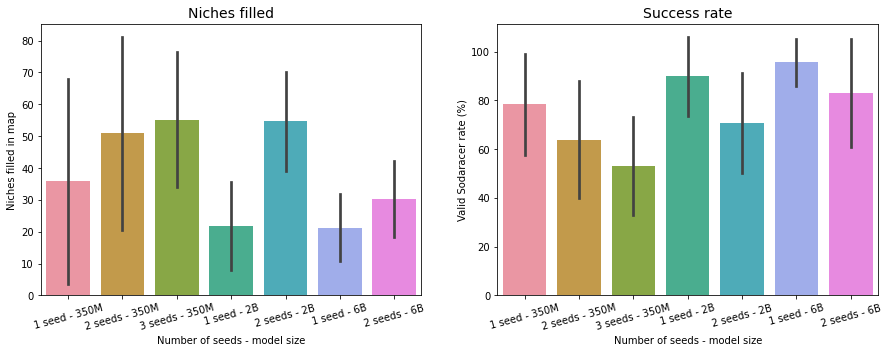

In [209]:
sns.set_palette("Spectral")
#sns.color_palette("pastel")
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x="new", y="niches", data=combined, errorbar="sd", ax=axs[0])
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=15)
axs[0].set_xlabel("Number of seeds - model size")
axs[0].set_ylabel("Niches filled in map")
axs[0].set_title("Niches filled", fontsize=14)


sns.barplot(x="new", y="rates", data=combined, errorbar="sd", ax=axs[1])
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=15)
# axs[1].yaxis.set_label_position("right")
axs[1].set_xlabel("Number of seeds - model size")
axs[1].set_ylabel("Valid Sodaracer rate (%)")
axs[1].set_title("Success rate", fontsize=14)

#plt.suptitle("LMX with Sodaracers", fontsize=16)
plt.savefig("lmx_sodaracers.pdf", dpi=600, bbox_inches='tight')

Text(0, 0.5, 'Niches filled in map')

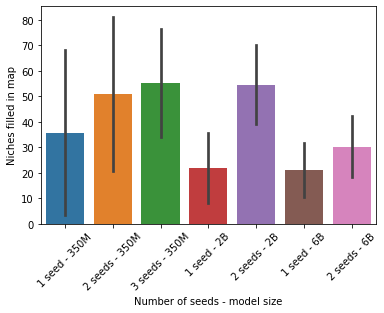

In [184]:
sns.barplot(x="new", y="niches", data=combined, errorbar="sd")
_ = plt.xticks(rotation=45)
plt.xlabel("Number of seeds - model size")
plt.ylabel("Niches filled in map")

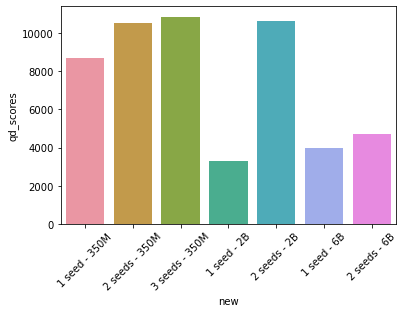

In [214]:
# layer swarmplot and catplot?
sns.barplot(x="new", y="qd_scores", data=combined, errorbar=None)
_ = plt.xticks(rotation=45)

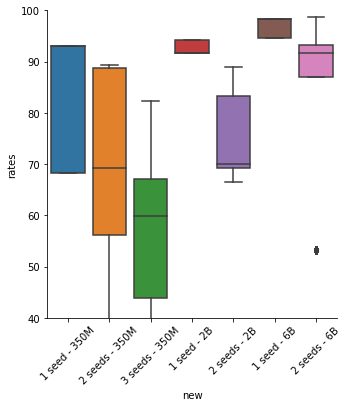

In [177]:
sns.catplot(x="new", y="rates", data=combined, kind="box")
_ = plt.xticks(rotation=45)
_ = plt.ylim(40, 100)

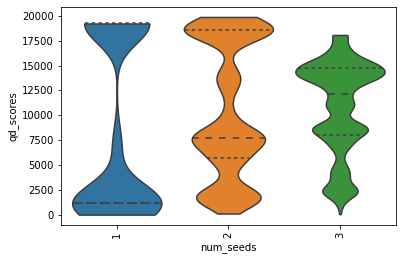

In [39]:
sns.violinplot(x="num_seeds", y="qd_scores", data=df_350m, inner="quartile", scale="width", cut=0)
_ = plt.xticks(rotation=90)
#_ = plt.ylim(0, 400)

<AxesSubplot:xlabel='num_seeds', ylabel='qd_scores'>

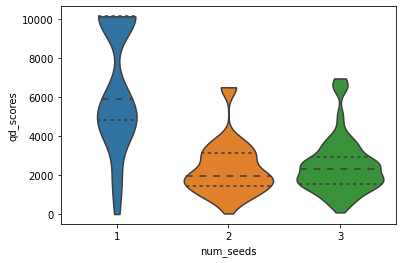

In [95]:
sns.violinplot(x="num_seeds", y="qd_scores", data=df_2b, inner="quartile", cut=0)
# _ = plt.xticks(rotation=90)
# _ = plt.ylim(0, 400)

<AxesSubplot:xlabel='num_seeds', ylabel='niches'>

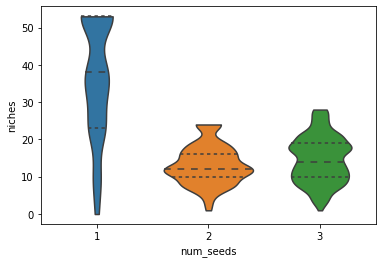

In [96]:
sns.violinplot(x="num_seeds", y="niches", data=df_2b, inner="quartile", cut=0)

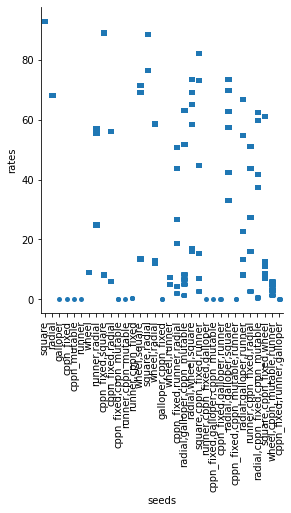

In [40]:
# ax = plt.figure(figsize=(15, 15))
sns.catplot(df_350m, y="rates", x="seeds")
_ = plt.xticks(rotation=90)

(0.0, 300.0)

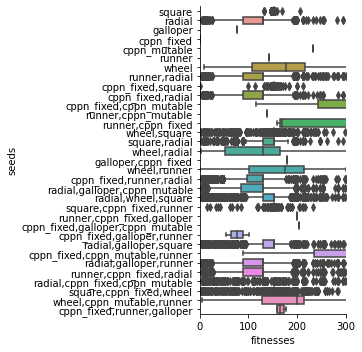

In [46]:
sns.catplot(df_350m, x="fitnesses", y="seeds")
plt.xlim(0, 300)

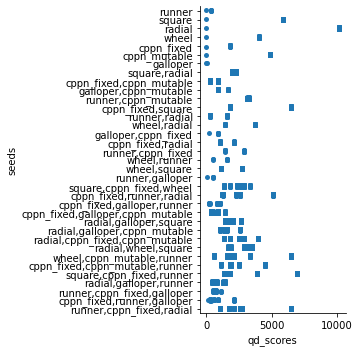

In [16]:
sns.catplot(df_2b, x="qd_scores", y="seeds")

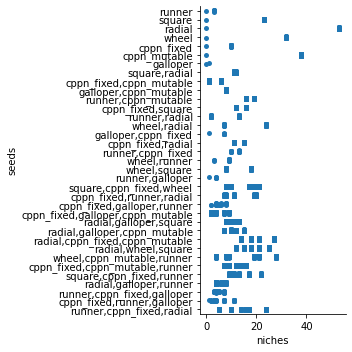

In [17]:
sns.catplot(df_2b, x="niches", y="seeds")